### Code to extract and plot spectra from a single NEON AOP pixel
Author: Adam Young   
Date Created: 2018-07-10   
Contact: amyoun01 [at] gmail [dot] com   

The goal is to extract a single pixel from a hperspectral hdf5 file and plot 3 figures, both without removing the bad bands of unusable data and with those bands. We also want to export a csv of the cleaned wavelength and reflectance information for use later. 

In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import copy # Import only 'copy' function from 'copy' package
import IPython
%matplotlib inline

In [2]:
refl_filename = ('../data/NEON_D17_SJER_DP1_20180401_184649_reflectance.h5')
refl_filename

'../data/NEON_D17_SJER_DP1_20180401_184649_reflectance.h5'

In [3]:
pixel_to_plot = (100,100)
pixel_to_plot

(100, 100)

In [4]:
# Read in reflectance hdf5 file
hdf5_file = h5py.File(refl_filename,'r')
hdf5_file

<HDF5 file "NEON_D17_SJER_DP1_20180401_184649_reflectance.h5" (mode r)>

In [5]:
# Get the file name
file_attrs_string = str(list(hdf5_file.items()))
file_attrs_string

'[(\'SJER\', <HDF5 group "/SJER" (1 members)>)]'

In [6]:
file_attrs_string_split = file_attrs_string.split("'")
file_attrs_string_split

['[(', 'SJER', ', <HDF5 group "/SJER" (1 members)>)]']

In [7]:
sitename = file_attrs_string_split[1]
sitename

'SJER'

In [8]:
# Extract the reflectance
refl = hdf5_file[sitename]['Reflectance']
refl

<HDF5 group "/SJER/Reflectance" (2 members)>

In [9]:
list(refl.attrs)

['Description',
 'Sensor',
 'PayloadID',
 'Scripts',
 'Acquisition_Time',
 'Band_Window_1_Nanometers',
 'Band_Window_2_Nanometers']

In [10]:
# Get the reflectance data
refldata = refl['Reflectance_Data']
refldata

<HDF5 dataset "Reflectance_Data": shape (216, 699, 426), type "<i2">

In [11]:
# Get the raw data values for the reflectance data
reflRaw = refl['Reflectance_Data'].value
reflRaw

array([[[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]],

       [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]],

       [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -99

In [12]:
# Create a data structure containing relevant metadata information
# make empty dictionary first
metadata = {}
metadata

{}

In [13]:
# Store the map_info into a key of the same name
metadata['map_info'] = refl['Metadata']['Coordinate_System']['Map_Info'].value
metadata

{'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0'}

In [14]:
# Store the wavelength info into a key of the same name
metadata['wavelength'] = refl['Metadata']['Spectral_Data']['Wavelength'].value
metadata

{'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
         631.889709,  636.900024,  641.910278,  646.920471,  651.930786,
         656.941101,  661.951416,  666.

In [15]:
# Extract NoData value and store into dictionary
metadata['data_ignore_value'] = float(refldata.attrs['Data_Ignore_Value'])
metadata

{'data_ignore_value': -9999.0,
 'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
         631.889709,  636.900024,  641.910278,  646.920471,  651.930786,
        

In [16]:
# Extract the scale factor
metadata['reflectance_scale_factor'] = float(refldata.attrs['Scale_Factor'])
metadata

{'data_ignore_value': -9999.0,
 'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'reflectance_scale_factor': 10000.0,
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
         631.889709,  636.900024,  641.9102

In [17]:
# Apply the NoData value 

# Convert raw reflectance into type float (was integer, see above)
reflClean = reflRaw.astype(float)
reflClean

array([[[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],

       [[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],

       [[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-99

In [18]:
# Capture shape of raw data
arr_size = reflClean.shape
arr_size

(216, 699, 426)

In [19]:
number_of_values_where_NoData = np.count_nonzero(reflClean == metadata['data_ignore_value'])
number_of_values_where_NoData

31535502

In [20]:
total_number_of_values_in_array = (arr_size[0]*arr_size[1]*arr_size[2])

In [21]:
# Check for number of missing data points
# No result here means all clean
if metadata['data_ignore_value'] in reflRaw:
    # print out the perecent with NoData round to 1 decimal place
    print('% of Points with No Data: ',
         np.round(number_of_values_where_NoData * 100 / total_number_of_values_in_array,1))
    # Replace the ignore values with NaNs
    nodata_ind = np.where(reflClean == metadata['data_ignore_value'])
    reflClean[nodata_ind] = np.nan

% of Points with No Data:  49.0


In [22]:
# Apply Scale Factor
reflArray = reflClean / metadata['reflectance_scale_factor']
reflArray

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [23]:
# Extract spatial extent from attributes
metadata['spatial_extent'] = refldata.attrs['Spatial_Extent_meters']
metadata

{'data_ignore_value': -9999.0,
 'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'reflectance_scale_factor': 10000.0,
 'spatial_extent': array([ 254192.,  254891., 4102667., 4102883.]),
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  

In [24]:
# Extract bad band windows
metadata['bad_band_window1'] = refl.attrs['Band_Window_1_Nanometers']
metadata['bad_band_window1']

array([1340, 1445], dtype=int32)

In [25]:
metadata['bad_band_window2'] = refl.attrs['Band_Window_2_Nanometers']
metadata['bad_band_window2']

array([1790, 1955], dtype=int32)

In [26]:
# Extract projection information
# metadata['projection'] = refl['Metadata']['Coordinate_System']['Proj4'].value
metadata['epsg'] = int(refl['Metadata']['Coordinate_System']['EPSG Code'].value)
metadata['epsg']

32611

In [27]:
# Extract Projection Information
mapInfo = refl['Metadata']['Coordinate_System']['Map_Info'].value
mapInfo

b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0'

In [28]:
hdf5_file.close

<bound method File.close of <HDF5 file "NEON_D17_SJER_DP1_20180401_184649_reflectance.h5" (mode r)>>

In [29]:
# Make a new empty pandas data frame
serc_pixel_df = pd.DataFrame()

In [30]:
# Make a new empty pandas dataframe
serc_pixel_df['reflectance'] = reflArray[pixel_to_plot[0],pixel_to_plot[1],:]

In [31]:
serc_pixel_df['wavelength'] = metadata['wavelength']

In [32]:
serc_pixel_df.head(5)

,reflectance,wavelength
0,0.0233,381.375793
1,0.0326,386.385986
2,0.0337,391.396301
3,0.0359,396.406586
4,0.0347,401.416901


In [33]:
serc_pixel_df.tail(5)

,reflectance,wavelength
421,0.0918,2490.703125
422,0.1010,2495.713379
423,0.0983,2500.723633
424,0.0850,2505.733887
425,0.0836,2510.744141


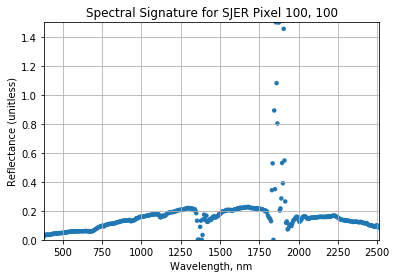

In [34]:
# Make a plot!!
serc_pixel_df.plot(x='wavelength',
                  y ='reflectance',
                  kind='scatter',
                  edgecolor='none')
plt.title('Spectral Signature for '+sitename+' Pixel '+', '.join(map(str,pixel_to_plot)))

ax = plt.gca() # gca (get current axes)

ax.set_xlim([np.min(serc_pixel_df['wavelength']),
            np.max(serc_pixel_df['wavelength'])])

ax.set_ylim([np.min(serc_pixel_df['reflectance']),
             np.max(serc_pixel_df['reflectance'])])

ax.set_xlabel("Wavelength, nm")
ax.set_ylabel("Reflectance (unitless)")

ax.grid(True)

fig = ax.get_figure()
fig.savefig('./output/figs/'+sitename+'_plot1.png')

In [35]:
serc_pixel_df.to_csv('./output/csv/'+sitename+'.csv')

In [36]:
%whos

Variable                          Type           Data/Info
----------------------------------------------------------
IPython                           module         <module 'IPython' from '/<...>ges/IPython/__init__.py'>
arr_size                          tuple          n=3
ax                                AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
copy                              function       <function copy at 0x1083b37b8>
fig                               Figure         Figure(432x288)
file_attrs_string                 str            [('SJER', <HDF5 group "/SJER" (1 members)>)]
file_attrs_string_split           list           n=3
h5py                              module         <module 'h5py' from '/ana<...>ckages/h5py/__init__.py'>
hdf5_file                         File           <HDF5 file "NEON_D17_SJER<...>reflectance.h5" (mode r)>
mapInfo                           bytes          b'UTM,  1.000,  1.000,  2<...>WGS-84,  units=Meters, 0'
metadata                       

In [37]:
print(IPython.sys_info())

{'commit_hash': '7f10f7bb3',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/anaconda3/envs/py35/lib/python3.5/site-packages/IPython',
 'ipython_version': '6.4.0',
 'os_name': 'posix',
 'platform': 'Darwin-17.6.0-x86_64-i386-64bit',
 'sys_executable': '/anaconda3/envs/py35/bin/python',
 'sys_platform': 'darwin',
 'sys_version': '3.5.5 |Anaconda custom (64-bit)| (default, Apr 26 2018, '
                '08:11:22) \n'
                '[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'}
